# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

In [ ]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements3.csv")
print(filepath)
df3 = pd.read_csv(filepath)

In [129]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements2.csv")
print(filepath)
df2 = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\1.25mCops_4t\AA\run_measurements2.csv


### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [130]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "load_measurements1.csv")
print(filepath)
df1 = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\1.25mCops_4t\AA\load_measurements1.csv


In [131]:
df = pd.concat([df1, df2, df3])
df = df1

### Set Versions as Variables

In [132]:
phase = "Run"
versionA = "Version A: Cassandra 4.0.4"
versionB = "Version B: Cassandra 4.0.4"

### Insert latencies in ms into the measurement table

In [133]:
df["latency_ms"] = (df["received"]- df["sent"])/1000000

In [134]:
df["sent_ms"] = df["sent"].div(1000000)
df["received_ms"] = df["received"].div(1000000)

In [135]:
df.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,6.249995e+05,1.670913e+12,1.670923e+12,9.640993e+00,1.670913e+06,1.670923e+06
std,3.608440e+05,2.900276e+11,2.900275e+11,3.354752e+01,2.900276e+05,2.900275e+05
min,0.000000e+00,1.159941e+12,1.160008e+12,5.717270e-01,1.159941e+06,1.160008e+06
25%,3.124998e+05,1.438786e+12,1.438800e+12,1.396807e+00,1.438786e+06,1.438800e+06
50%,6.249995e+05,1.680659e+12,1.680675e+12,2.559848e+00,1.680659e+06,1.680675e+06
75%,9.374992e+05,1.915558e+12,1.915562e+12,5.217218e+00,1.915558e+06,1.915562e+06
max,1.249999e+06,2.187319e+12,2.187320e+12,2.041061e+03,2.187319e+06,2.187320e+06


In [136]:
df = df.sort_values(by="sent", ascending=True)
df.head()

,workerId,queryType,queryId,sent,received,target-region,latency_ms,sent_ms,received_ms
0,w1-vA,INSERT,0,1159941241069,1160008991157,unknown,67.750088,1.159941e+06,1.160009e+06
1,w1-vA,INSERT,625002,1159941783359,1160008219008,unknown,66.435649,1.159942e+06,1.160008e+06
2,w1-vA,INSERT,312501,1159941937850,1160012351066,unknown,70.413216,1.159942e+06,1.160012e+06
5,w1-vB,INSERT,0,1159942063523,1160053103281,unknown,111.039758,1.159942e+06,1.160053e+06
6,w1-vB,INSERT,937503,1159942135459,1160053886841,unknown,111.751382,1.159942e+06,1.160054e+06


### Restructure Timeline

In [137]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000000/1000

### Return benchmark run time (First request send to last response received)

In [138]:
totalTime = df["received"].max() - df["sent"].min()
print(totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "m") 

1027.379024097 seconds or 17.12298373495 m


### Prune Measurements and print new run time for pruned benchmark (Remove first and last 100 seconds)

In [139]:
dfPruned = df.loc[(df["sent_sec"] > 100) & (df["sent_sec"] < (totalTime/1000000/1000) - 100)]

In [140]:
totalTime = dfPruned["received"].max() - dfPruned["sent"].min()
print("Pruned time:\n",totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "minutes") 

Pruned time:
 828.003968485 seconds or 13.800066141416666 minutes


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [141]:
dfA1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vA")]
dfA2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vA")]
dfA3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vA")]
dfB1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vB")]
dfB2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vB")]
dfB3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vB")]
dfA = dfPruned.loc[(dfPruned["workerId"] == "w1-vA") | (dfPruned["workerId"] == "w2-vA") | (dfPruned["workerId"] == "w3-vA")]
dfB = dfPruned.loc[(dfPruned["workerId"] == "w1-vB") | (dfPruned["workerId"] == "w2-vB") | (dfPruned["workerId"] == "w3-vB")]
dfARaw = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfBRaw = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]

In [142]:
dfARaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,6.249995e+05,1.673596e+12,1.673605e+12,9.671935e+00,1.673596e+06,1.673605e+06,5.136543e+02
std,3.608441e+05,2.901792e+11,2.901791e+11,3.360772e+01,2.901792e+05,2.901791e+05,2.901792e+02
min,0.000000e+00,1.159941e+12,1.160008e+12,5.717270e-01,1.159941e+06,1.160008e+06,0.000000e+00
25%,3.124998e+05,1.442840e+12,1.442845e+12,1.389221e+00,1.442840e+06,1.442845e+06,2.828987e+02
50%,6.249995e+05,1.679615e+12,1.679620e+12,2.536216e+00,1.679615e+06,1.679620e+06,5.196733e+02
75%,9.374992e+05,1.918255e+12,1.918331e+12,5.220429e+00,1.918255e+06,1.918331e+06,7.583142e+02
max,1.249999e+06,2.187319e+12,2.187320e+12,2.041061e+03,2.187319e+06,2.187320e+06,1.027378e+03


In [143]:
dfBRaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06,1.250000e+06
mean,6.249995e+05,1.668230e+12,1.668240e+12,9.610052e+00,1.668230e+06,1.668240e+06,5.082891e+02
std,3.608441e+05,2.898512e+11,2.898511e+11,3.348720e+01,2.898512e+05,2.898511e+05,2.898512e+02
min,0.000000e+00,1.159942e+12,1.160052e+12,5.837300e-01,1.159942e+06,1.160052e+06,8.224540e-04
25%,3.124998e+05,1.433825e+12,1.433834e+12,1.404621e+00,1.433825e+06,1.433834e+06,2.738843e+02
50%,6.249995e+05,1.681750e+12,1.681756e+12,2.583207e+00,1.681750e+06,1.681756e+06,5.218088e+02
75%,9.374992e+05,1.912574e+12,1.912578e+12,5.214357e+00,1.912574e+06,1.912578e+06,7.526327e+02
max,1.249999e+06,2.181143e+12,2.181145e+12,1.233775e+03,2.181143e+06,2.181145e+06,1.021202e+03


In [144]:
dfA.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.005374e+06,1.005374e+06,1.005374e+06,1.005374e+06,1.005374e+06,1.005374e+06,1.005374e+06
mean,6.306567e+05,1.694851e+12,1.694861e+12,9.868969e+00,1.694851e+06,1.694861e+06,5.349099e+02
std,3.565073e+05,2.306700e+11,2.306691e+11,3.536034e+01,2.306700e+05,2.306691e+05,2.306700e+02
min,3.444500e+04,1.259941e+12,1.259943e+12,5.717270e-01,1.259941e+06,1.259943e+06,1.000002e+02
25%,3.481798e+05,1.515863e+12,1.515871e+12,1.321178e+00,1.515863e+06,1.515871e+06,3.559213e+02
50%,6.016975e+05,1.698267e+12,1.698275e+12,2.341398e+00,1.698267e+06,1.698275e+06,5.383256e+02
75%,9.712602e+05,1.889575e+12,1.889581e+12,4.731092e+00,1.889575e+06,1.889581e+06,7.296335e+02
max,1.226058e+06,2.087320e+12,2.087945e+12,2.041061e+03,2.087320e+06,2.087945e+06,9.273790e+02


In [145]:
dfB.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1.004799e+06,1.004799e+06,1.004799e+06,1.004799e+06,1.004799e+06,1.004799e+06,1.004799e+06
mean,6.342228e+05,1.696405e+12,1.696415e+12,9.874314e+00,1.696405e+06,1.696415e+06,5.364640e+02
std,3.574117e+05,2.304919e+11,2.304909e+11,3.519826e+01,2.304919e+05,2.304909e+05,2.304919e+02
min,3.670700e+04,1.259943e+12,1.259945e+12,5.837300e-01,1.259943e+06,1.259945e+06,1.000014e+02
25%,3.512195e+05,1.515890e+12,1.515897e+12,1.331683e+00,1.515890e+06,1.515897e+06,3.559484e+02
50%,6.653110e+05,1.707178e+12,1.707186e+12,2.366544e+00,1.707178e+06,1.707186e+06,5.472363e+02
75%,9.772770e+05,1.887856e+12,1.887861e+12,4.692519e+00,1.887856e+06,1.887861e+06,7.279145e+02
max,1.233903e+06,2.087318e+12,2.087674e+12,1.184143e+03,2.087318e+06,2.087674e+06,9.273766e+02


### Min. Latencies for Worker 2 (A & B)

In [146]:
dfA3.loc[dfA3["latency_ms"].idxmin()]

workerId                  w3-vA
queryType                INSERT
queryId                  547097
sent              1912228156113
received          1912228727840
target-region           unknown
latency_ms             0.571727
sent_ms          1912228.156113
received_ms       1912228.72784
sent_sec             752.286915
Name: 2286812, dtype: object

In [147]:
dfB1.loc[dfB1["latency_ms"].idxmin()]

workerId                  w1-vB
queryType                INSERT
queryId                 1174020
sent              1901116195147
received          1901116804651
target-region           unknown
latency_ms             0.609504
sent_ms          1901116.195147
received_ms      1901116.804651
sent_sec             741.174954
Name: 619155, dtype: object

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [148]:

dfA2["sent"].min() - dfB2["sent"].min()

-1229153

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [149]:
dfA1["sent"].max() - dfB1["sent"].max() 


2393571

## Create Figures 

### Create Boxplots

In [150]:
sns.set_theme(style="darkgrid")
print(len(dfA))

1005374


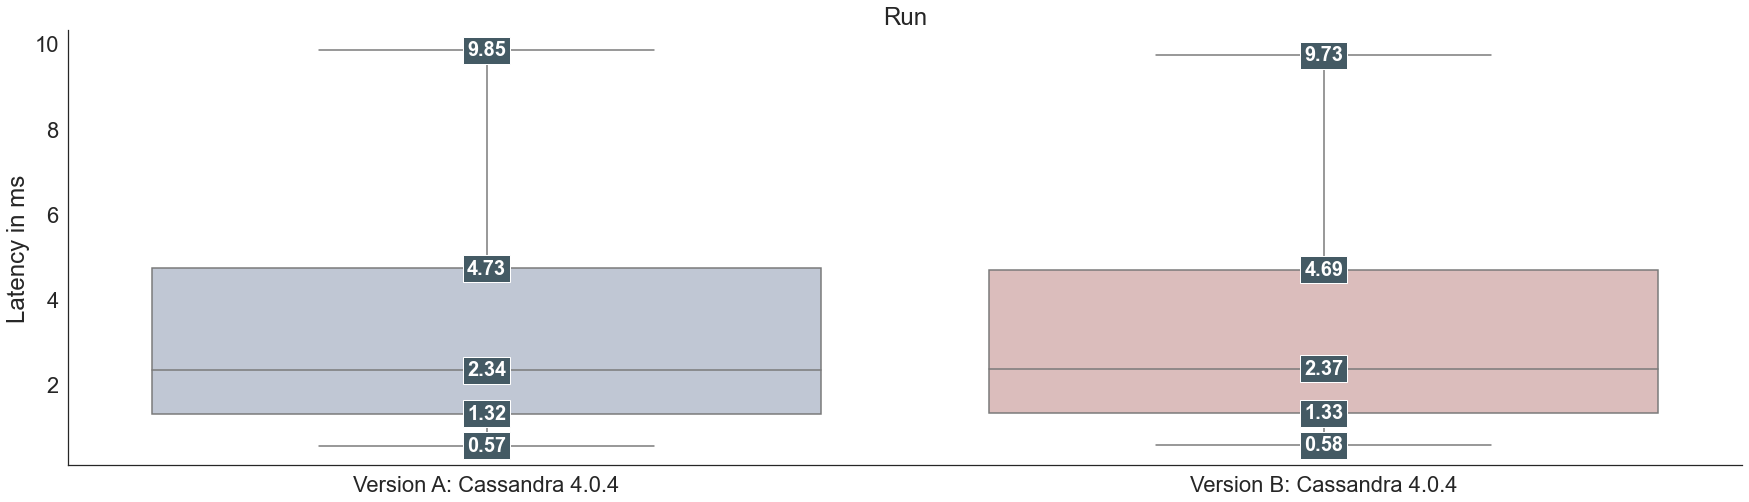

In [151]:

combined_dfs = pd.DataFrame({versionA: dfA['latency_ms'],
                             versionB: dfB['latency_ms']})
                             
sns.set_style('white')
sns.set_context('notebook', font_scale=2.0)

box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False, whis=1.5,palette="vlag").set_title(phase)




ax = box_plot.axes
ax.set_ylabel("Latency in ms")
lines = ax.get_lines()

categories = ax.get_xticks()

for i in range(0,5):
    for cat in categories:

        y = round(lines[(i+cat*5)].get_ydata()[0],2) 

        ax.text(
            cat, 
            y, 
            f'{y}', 
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=20,
            color='white',
            bbox=dict(facecolor='#445A64'))


sns.despine()



### Create Flowchart

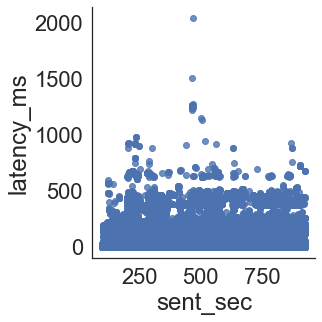

In [ ]:
plot = sns.lmplot(x='sent_sec', y='latency_ms', data=dfA, fit_reg=False)
plot = sns.lmplot(x='sent_sec', y='latency_ms', data=dfB, fit_reg=False)

In [ ]:
dfB.plot.line(x='sent_sec', y='latency_ms')

In [ ]:
sns.lineplot(data=dfA, x="sent_sec", y="latency_ms")


In [ ]:
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(30,8)})
print(len(df))

### Create Linechart comparing latencies of Version A and B

In [ ]:
subchartA = dfA[['sent_sec', 'latency_ms']]
subchartB = dfB[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(200).mean().shift(-50)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(200).mean().shift(-50)

p = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.1)
sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.1).set_title(phase)
p.set_xlabel("Seconds");
p.set_ylabel("Latency in ms");
